In [1]:
import numpy as np
import pandas as pd

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./df_OH.csv')

In [4]:
df.head()

,DETERIORATION_RATE,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,AGE,DESIGN_LOAD_031,TRUCK_ADT,MAINTENANCE_021,WATERWAY_EVAL_071,LONGITUDE,LATITUDE,STRUCTURE_KIND_043A_steel,FUNCTIONAL_CLASS_026_urban,elevation
0,0.166667,2,0,42,3,21.9,59.1,12.8,1,36.0,2,601.51,1.0,0,-83.401167,38.563001,1,0,211.008438
1,0.214286,2,0,42,3,21.9,59.1,12.8,1,36.0,2,601.51,1.0,0,-83.401335,38.563001,1,0,215.009430
2,0.066667,2,0,10,3,40.0,104.9,14.1,1,20.0,2,288.96,1.0,1,-83.271668,38.536502,1,0,281.445312
3,0.129630,2,0,0,3,24.4,56.7,14.3,1,21.0,2,329.40,1.0,2,-83.372834,38.410834,1,0,340.709839
4,0.187500,2,0,0,3,30.8,76.8,12.2,2,36.0,2,144.04,1.0,1,-83.349003,38.416168,1,0,280.783264


In [5]:
df['elevation'].isna().value_counts()

False    4337
True        3
Name: elevation, dtype: int64

In [6]:
df.dropna(inplace = True)

In [7]:
df.shape

(4337, 19)

In [8]:
df['DETERIORATION_RATE'].describe()

count    4.337000e+03
mean     1.112958e-01
std      9.947549e-02
min      8.881784e-17
25%      5.000000e-02
50%      8.333333e-02
75%      1.428571e-01
max      1.000000e+00
Name: DETERIORATION_RATE, dtype: float64

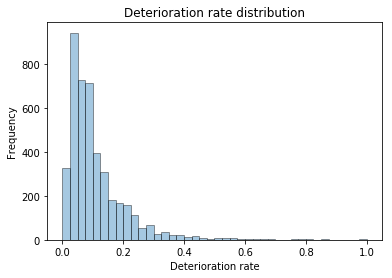

In [20]:
sns.distplot(df['DETERIORATION_RATE'], kde = False, bins = 40, hist_kws=dict(edgecolor="k"))
plt.title('Deterioration rate distribution')
plt.xlabel('Deterioration rate')
plt.ylabel('Frequency')
plt.show()

A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions, because there is a long tail in the positive direction on the number line. 

The mean (0.111) is placed to the right (i.e. higher than) of the median (0.083).

In [21]:
df = df[df['DETERIORATION_RATE']<0.4]

A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions, because there is a long tail in the positive direction on the number line. 

The mean (0.111) is placed to the right (i.e. higher than) of the median (0.083).

/home/dsc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


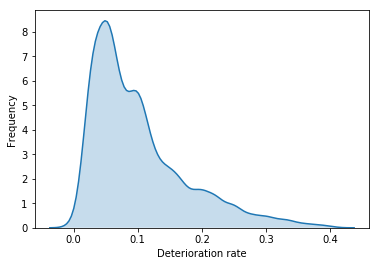

In [22]:
sns.distplot(df['DETERIORATION_RATE'], hist = False, kde_kws = {'shade':True}).set(xlabel = 'Deterioration rate', ylabel = 'Frequency')
plt.show()

In [23]:
y = np.array(df['DETERIORATION_RATE']).reshape(-1,1)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_y = scaler.fit_transform(y)

/home/dsc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


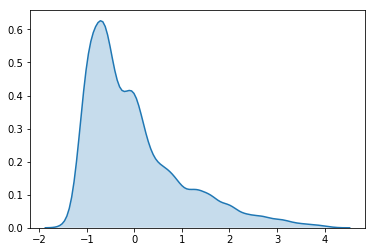

In [25]:
sns.distplot(scaled_y, hist = False, kde_kws = {'shade':True})
plt.show()

In [31]:
type(scaled_y)

numpy.ndarray

In [32]:
from scipy import stats
print(stats.describe(scaled_y))


DescribeResult(nobs=4242, minmax=(array([-1.37453001]), array([4.02939601])), mean=array([-1.59126732e-16]), variance=array([1.00023579]), skewness=array([1.33246814]), kurtosis=array([1.49184766]))


In [36]:
np.array(scaled_y)

array([[ 0.87710583],
       [ 1.52043036],
       [-0.47387567],
       ...,
       [ 0.31419687],
       [ 3.35390526],
       [-0.62398473]])

In [45]:
df['DETERIORATION_RATE']=scaler.fit_transform(df[['DETERIORATION_RATE']].values)

In [46]:
df.head()

,DETERIORATION_RATE,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,AGE,DESIGN_LOAD_031,TRUCK_ADT,MAINTENANCE_021,WATERWAY_EVAL_071,LONGITUDE,LATITUDE,STRUCTURE_KIND_043A_steel,FUNCTIONAL_CLASS_026_urban,elevation
0,0.877106,2,0,42,3,21.9,59.1,12.8,1,36.0,2,601.51,1.0,0,-83.401167,38.563001,1,0,211.008438
1,1.520430,2,0,42,3,21.9,59.1,12.8,1,36.0,2,601.51,1.0,0,-83.401335,38.563001,1,0,215.009430
2,-0.473876,2,0,10,3,40.0,104.9,14.1,1,20.0,2,288.96,1.0,1,-83.271668,38.536502,1,0,281.445312
3,0.376742,2,0,0,3,24.4,56.7,14.3,1,21.0,2,329.40,1.0,2,-83.372834,38.410834,1,0,340.709839
4,1.158560,2,0,0,3,30.8,76.8,12.2,2,36.0,2,144.04,1.0,1,-83.349003,38.416168,1,0,280.783264


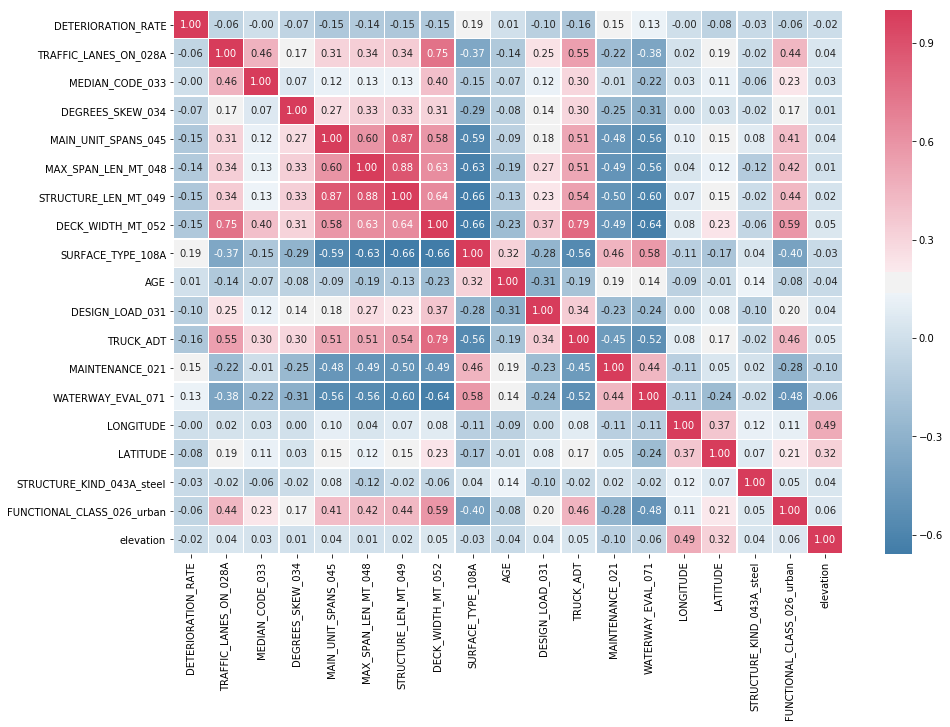

In [49]:
corr_matrix = df.corr('spearman')
fig, ax = plt.subplots(figsize = (15,10))
colormap = sns.diverging_palette(240,5, as_cmap=True)
sns.heatmap(corr_matrix, cmap = colormap, annot=True, fmt ='.2f', linewidths=0.3)
plt.show()

We can observe some correlations between the deterioration rate and deck width, design loads, steel structures and latitude. 

Latitude values vary from north to south, which, from a climatic point of view, means from cold to hot temperatures. It would be interesting to add some climatic data to the dataset.

We can also see some strong correlations between independent variables. For instance: 

     - Structure length has a correlation of 87% with the number of spans and the maximum span length. 
     
     - Traffic lanes and deck width have a 75% correlation.
     
We will have to drop some of the variables that are strongly correlated between them. Since the number of spans and the number of traffic lanes are poorly correlated with the deterioration rate, they will be dropped from our dataframe. 

In [72]:
list(df.columns)

['DETERIORATION_RATE',
 'DEGREES_SKEW_034',
 'STRUCTURE_LEN_MT_049',
 'DECK_WIDTH_MT_052',
 'SURFACE_TYPE_108A',
 'AGE',
 'DESIGN_LOAD_031',
 'TRUCK_ADT',
 'MAINTENANCE_021',
 'WATERWAY_EVAL_071',
 'LONGITUDE',
 'LATITUDE',
 'STRUCTURE_KIND_043A_steel',
 'FUNCTIONAL_CLASS_026_urban',
 'elevation']

In [51]:
col_drop = ['TRAFFIC_LANES_ON_028A','MEDIAN_CODE_033', 'MAIN_UNIT_SPANS_045','MAX_SPAN_LEN_MT_048']

In [52]:
df.drop(col_drop, axis =1, inplace = True)

In [78]:
# We choose the columns we want to normalize

col_norm = ['DEGREES_SKEW_034',
 'STRUCTURE_LEN_MT_049',
 'DECK_WIDTH_MT_052',
 'AGE',
 'TRUCK_ADT',
 'LONGITUDE',
 'LATITUDE',
 'elevation']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for col in col_norm:
    df[col] = scaler.fit_transform(df[[col]].values)
#col_scaled = scaler.fit_transform(df[col_norm].values)
#df_temp = pd.DataFrame(col_scaled, columns=col_scaled, index = df.index)
#df[col_scaled] = df_temp

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [79]:
df.head()

,DETERIORATION_RATE,DEGREES_SKEW_034,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,AGE,DESIGN_LOAD_031,TRUCK_ADT,MAINTENANCE_021,WATERWAY_EVAL_071,LONGITUDE,LATITUDE,STRUCTURE_KIND_043A_steel,FUNCTIONAL_CLASS_026_urban,elevation
0,0.989688,0.101010,0.001550,0.022472,2,0.224299,2,0.000904,2.0,2,0.347732,0.358677,1,0,0.295596
1,-0.699039,1.000000,0.182225,0.073970,2,0.392523,2,0.004341,4.0,0,0.951973,0.871887,1,1,0.489947
2,-0.699039,0.464646,0.115053,0.152622,1,0.514019,1,0.015037,1.0,0,0.793038,0.961380,1,1,0.668708
3,-0.173658,0.151515,0.012573,0.022472,2,0.261682,2,0.000583,2.0,2,0.941792,0.947917,1,0,0.456236
4,0.126561,0.222222,0.001550,0.029026,2,0.140187,2,0.000893,2.0,2,0.718022,0.629273,1,0,0.350011


In [80]:
df.describe()

,DETERIORATION_RATE,DEGREES_SKEW_034,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,AGE,DESIGN_LOAD_031,TRUCK_ADT,MAINTENANCE_021,WATERWAY_EVAL_071,LONGITUDE,LATITUDE,STRUCTURE_KIND_043A_steel,FUNCTIONAL_CLASS_026_urban,elevation
count,4.242000e+03,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000
mean,-9.203440e-17,0.164245,0.083230,0.090882,1.409241,0.270988,1.675860,0.049039,1.753890,0.823432,0.503607,0.605124,0.924092,0.363036,0.482332
std,1.000118e+00,0.192665,0.094332,0.079951,0.491752,0.162352,0.596166,0.102427,1.055304,0.790290,0.276141,0.259265,0.264881,0.480932,0.171485
min,-1.374530e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.990393e-01,0.000000,0.013607,0.035581,1.000000,0.140187,1.000000,0.000979,1.000000,0.000000,0.291810,0.379210,1.000000,0.000000,0.356572
50%,-2.937448e-01,0.101010,0.067172,0.068352,1.000000,0.233645,2.000000,0.006270,2.000000,1.000000,0.508164,0.628214,1.000000,0.000000,0.498621
75%,4.267787e-01,0.303030,0.114623,0.120552,2.000000,0.392523,2.000000,0.043062,2.000000,1.000000,0.742405,0.858135,1.000000,1.000000,0.612679
max,4.029396e+00,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


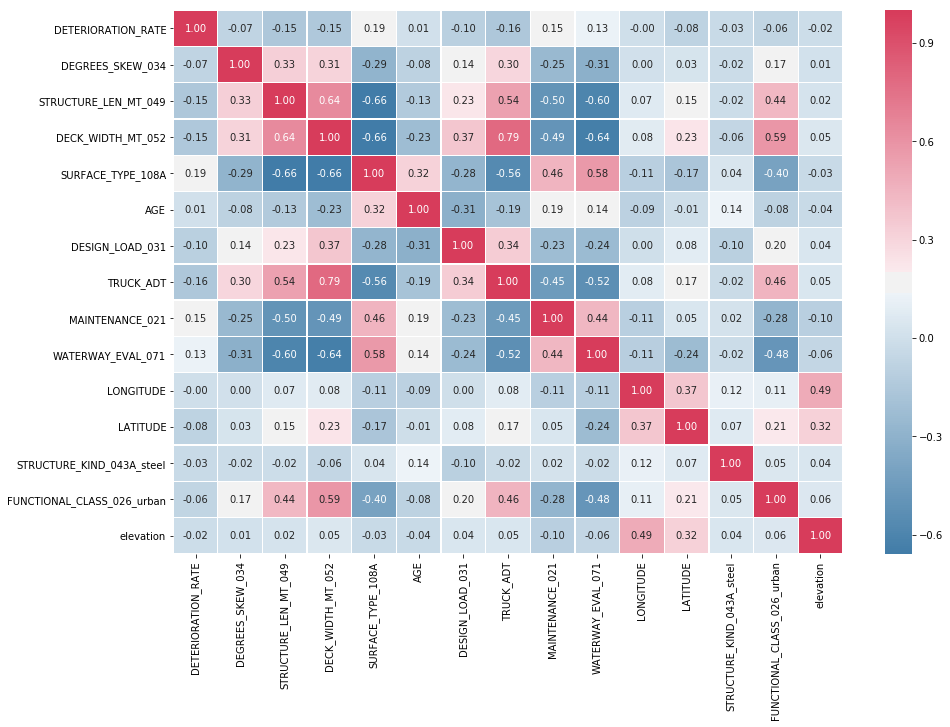

In [81]:
corr_matrix = df.corr('spearman')
fig, ax = plt.subplots(figsize = (15,10))
colormap = sns.diverging_palette(240,5, as_cmap=True)
sns.heatmap(corr_matrix, cmap = colormap, annot=True, fmt ='.2f', linewidths=0.3)
plt.show()

In [82]:
# Shuffle our dataframe first since bridges are ordered by state code in the df
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [10]:
df.head()

,DETERIORATION_RATE,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,AGE,DESIGN_LOAD_031,TRUCK_ADT,MAINTENANCE_021,WATERWAY_EVAL_071,LONGITUDE,LATITUDE,STRUCTURE_KIND_043A_steel,FUNCTIONAL_CLASS_026_urban,elevation
0,0.088889,4,0,15,9,27.1,217.3,18.3,1,27.0,2,418.84,1.0,1,-81.288500,41.081503,1,1,341.124237
1,0.037500,1,0,15,3,38.7,100.6,9.2,1,50.0,2,261.80,1.0,0,-84.300002,39.070001,1,1,273.240051
2,0.050000,2,0,5,4,25.0,84.7,12.2,1,14.0,2,235.10,1.0,0,-80.378002,41.030501,1,1,264.812286
3,0.300000,2,0,0,1,7.9,8.5,7.2,2,13.0,1,1.92,2.0,2,-83.238168,38.489001,1,0,316.016571
4,0.055556,2,0,0,1,16.8,18.0,8.5,2,46.0,2,21.28,2.0,1,-83.524167,41.100668,1,0,247.362579


In [83]:
list(df.columns)

['DETERIORATION_RATE',
 'DEGREES_SKEW_034',
 'STRUCTURE_LEN_MT_049',
 'DECK_WIDTH_MT_052',
 'SURFACE_TYPE_108A',
 'AGE',
 'DESIGN_LOAD_031',
 'TRUCK_ADT',
 'MAINTENANCE_021',
 'WATERWAY_EVAL_071',
 'LONGITUDE',
 'LATITUDE',
 'STRUCTURE_KIND_043A_steel',
 'FUNCTIONAL_CLASS_026_urban',
 'elevation']

In [84]:
# Data Preparation
X = df[[
     #'TRAFFIC_LANES_ON_028A',
 #'MEDIAN_CODE_033',
 'DEGREES_SKEW_034',
 #'MAIN_UNIT_SPANS_045',
 #'MAX_SPAN_LEN_MT_048',
 'STRUCTURE_LEN_MT_049',
 'DECK_WIDTH_MT_052',
 'SURFACE_TYPE_108A',
 'AGE',
 'DESIGN_LOAD_031',
 'TRUCK_ADT',
 'MAINTENANCE_021',
 'WATERWAY_EVAL_071',
 'LONGITUDE',
 'LATITUDE',
 'STRUCTURE_KIND_043A_steel',
 'FUNCTIONAL_CLASS_026_urban',
 'elevation']] 

y = df['DETERIORATION_RATE'] 

In [85]:
# Split into train and test
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [82]:
X_train.shape

(3472, 18)

In [87]:
# Mean model - predicts the average of the labels in the training data

pred1 = y_train.mean()
pred1

0.003351065460025747

In [88]:
dfr=pd.DataFrame()
dfr['y_real'] = y_train
dfr['y_pred1'] = pred1

In [89]:
dfr.head()

,y_real,y_pred1
1907,-0.023549,0.003351
3289,-1.104334,0.003351
1356,-0.969236,0.003351
29,-0.699039,0.003351
3592,-0.623985,0.003351


In [90]:
# Mean Absolute Error for mean model

dfr['resid1'] = np.abs(dfr['y_real']-dfr['y_pred1'])
dfr['resid1'].mean()

0.7781203398394047

In [91]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train,dfr['y_pred1'])

0.7781203398394065

In [92]:
# Mean Squared Error for mean model
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train,dfr['y_pred1']))

1.0038241351288246

### Linear regression

In [93]:
# Linear regression is the benchmark in a regression problem

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [94]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
y_pred = reg.predict(X_test)

In [96]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.7286487096541995

In [97]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.9557370116530077

The fit of the linear regression model is better than the fit of the mean model.

In [98]:
# Plot of the residuals
y_resid = y_test-y_pred

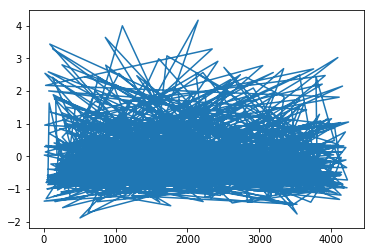

In [99]:
plt.plot(y_resid)

In [102]:
y_train_pred = reg.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_train_pred))

0.9747058839192102

In [100]:
# R2 score

from sklearn.metrics import r2_score
r2_score(y_test, y_pred) 

0.05749157132262883

R2 score is very low, which means that the features we are using as indepedent variables do not explain properly the deterioration rate of the bridges.

In [103]:
r2_score(y_train,y_train_pred)

0.05717322176709139

In [104]:
# Feature importance
reg_feature_list = pd.DataFrame(list(zip(X.columns,np.abs(reg.coef_))), columns = ['Feature','Importance'])
reg_feature_list.sort_values(by='Importance', ascending = False).reset_index(drop=True)

,Feature,Importance
0,TRUCK_ADT,0.430574
1,SURFACE_TYPE_108A,0.369025
2,LATITUDE,0.295716
3,AGE,0.279569
4,DECK_WIDTH_MT_052,0.233571
5,LONGITUDE,0.130386
6,DESIGN_LOAD_031,0.118248
7,STRUCTURE_LEN_MT_049,0.096414
8,FUNCTIONAL_CLASS_026_urban,0.088972
9,STRUCTURE_KIND_043A_steel,0.059427


### Ridge regularization

In [106]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = GridSearchCV(Ridge(),param_grid={"alpha": np.arange(0.5,100.5,0.5)},cv = 5)
ridge.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([  0.5,   1. , ...,  99.5, 100. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [107]:
ridge.best_score_

0.05234226555337758

In [108]:
ridge.best_params_

{'alpha': 24.5}

In [109]:
ridge.best_estimator_

Ridge(alpha=24.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [110]:
ridge_final = ridge.best_estimator_

In [111]:
r2_score(y_test,ridge_final.predict(X_test))

0.062369755025308504

In [112]:
np.sqrt(mean_squared_error(y_test,ridge_final.predict(X_test)))

0.9532604772776242

### K-Nearest Neighbors

In [32]:
from sklearn.neighbors import KNeighborsRegressor

regknn = KNeighborsRegressor(n_neighbors=38)

regknn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=38, p=2,
          weights='uniform')

In [33]:
mean_absolute_error(y_test,regknn.predict(X_test))

0.0671926933148283

In [34]:
np.sqrt(mean_squared_error(y_test,regknn.predict(X_test)))

0.09894947340991962

In [35]:
r2_score(y_test,regknn.predict(X_test))

0.04652631524514472

In [36]:
# Para ver que valor de k es el mejor tendré que ir probando
maes = []
for i in range(2,50):
    regk = KNeighborsRegressor(n_neighbors=i)
    regk.fit(X_train,y_train)
    maes.append(mean_absolute_error(y_test,regk.predict(X_test)))

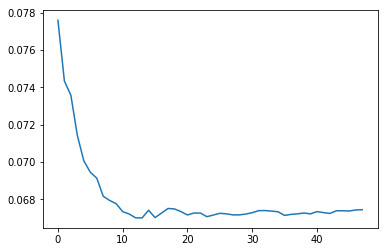

In [37]:
plt.plot(maes)

regknn10 = KNeighborsRegressor(n_neighbors=10)

regknn10.fit(X_train,y_train)

mean_absolute_error(y_test,regknn10.predict(X_test))

np.sqrt(mean_squared_error(y_test,regknn10.predict(X_test)))

regknn50 = KNeighborsRegressor(n_neighbors=50)

regknn50.fit(X_train,y_train)

np.sqrt(mean_squared_error(y_test,regknn50.predict(X_test)))

In [38]:
# GridSearchCV with RMSE score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
reg_test = GridSearchCV(KNeighborsRegressor(), param_grid={'n_neighbors':np.arange(3,40)}, scoring = 'neg_mean_squared_error')
reg_test.fit(X,y)

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [39]:
reg_test.best_params_

{'n_neighbors': 38}

In [40]:
reg_test.best_score_

-0.009520903870255603

In [42]:
np.sqrt(-reg_test.best_score_)

0.09757511911473951

In [41]:
reg_test.scoring

'neg_mean_squared_error'

In [43]:
reg_final = reg_test.best_estimator_

In [44]:
r2_score(y_test,reg_final.predict(X_test))

0.09540884813963446

# GridSearchCV with R2 score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
reg_test = GridSearchCV(KNeighborsRegressor(), param_grid={'n_neighbors':np.arange(5,50)}, 
                        scoring='r2')
reg_test.fit(X,y)

reg_test.best_params_

reg_test.best_score_

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

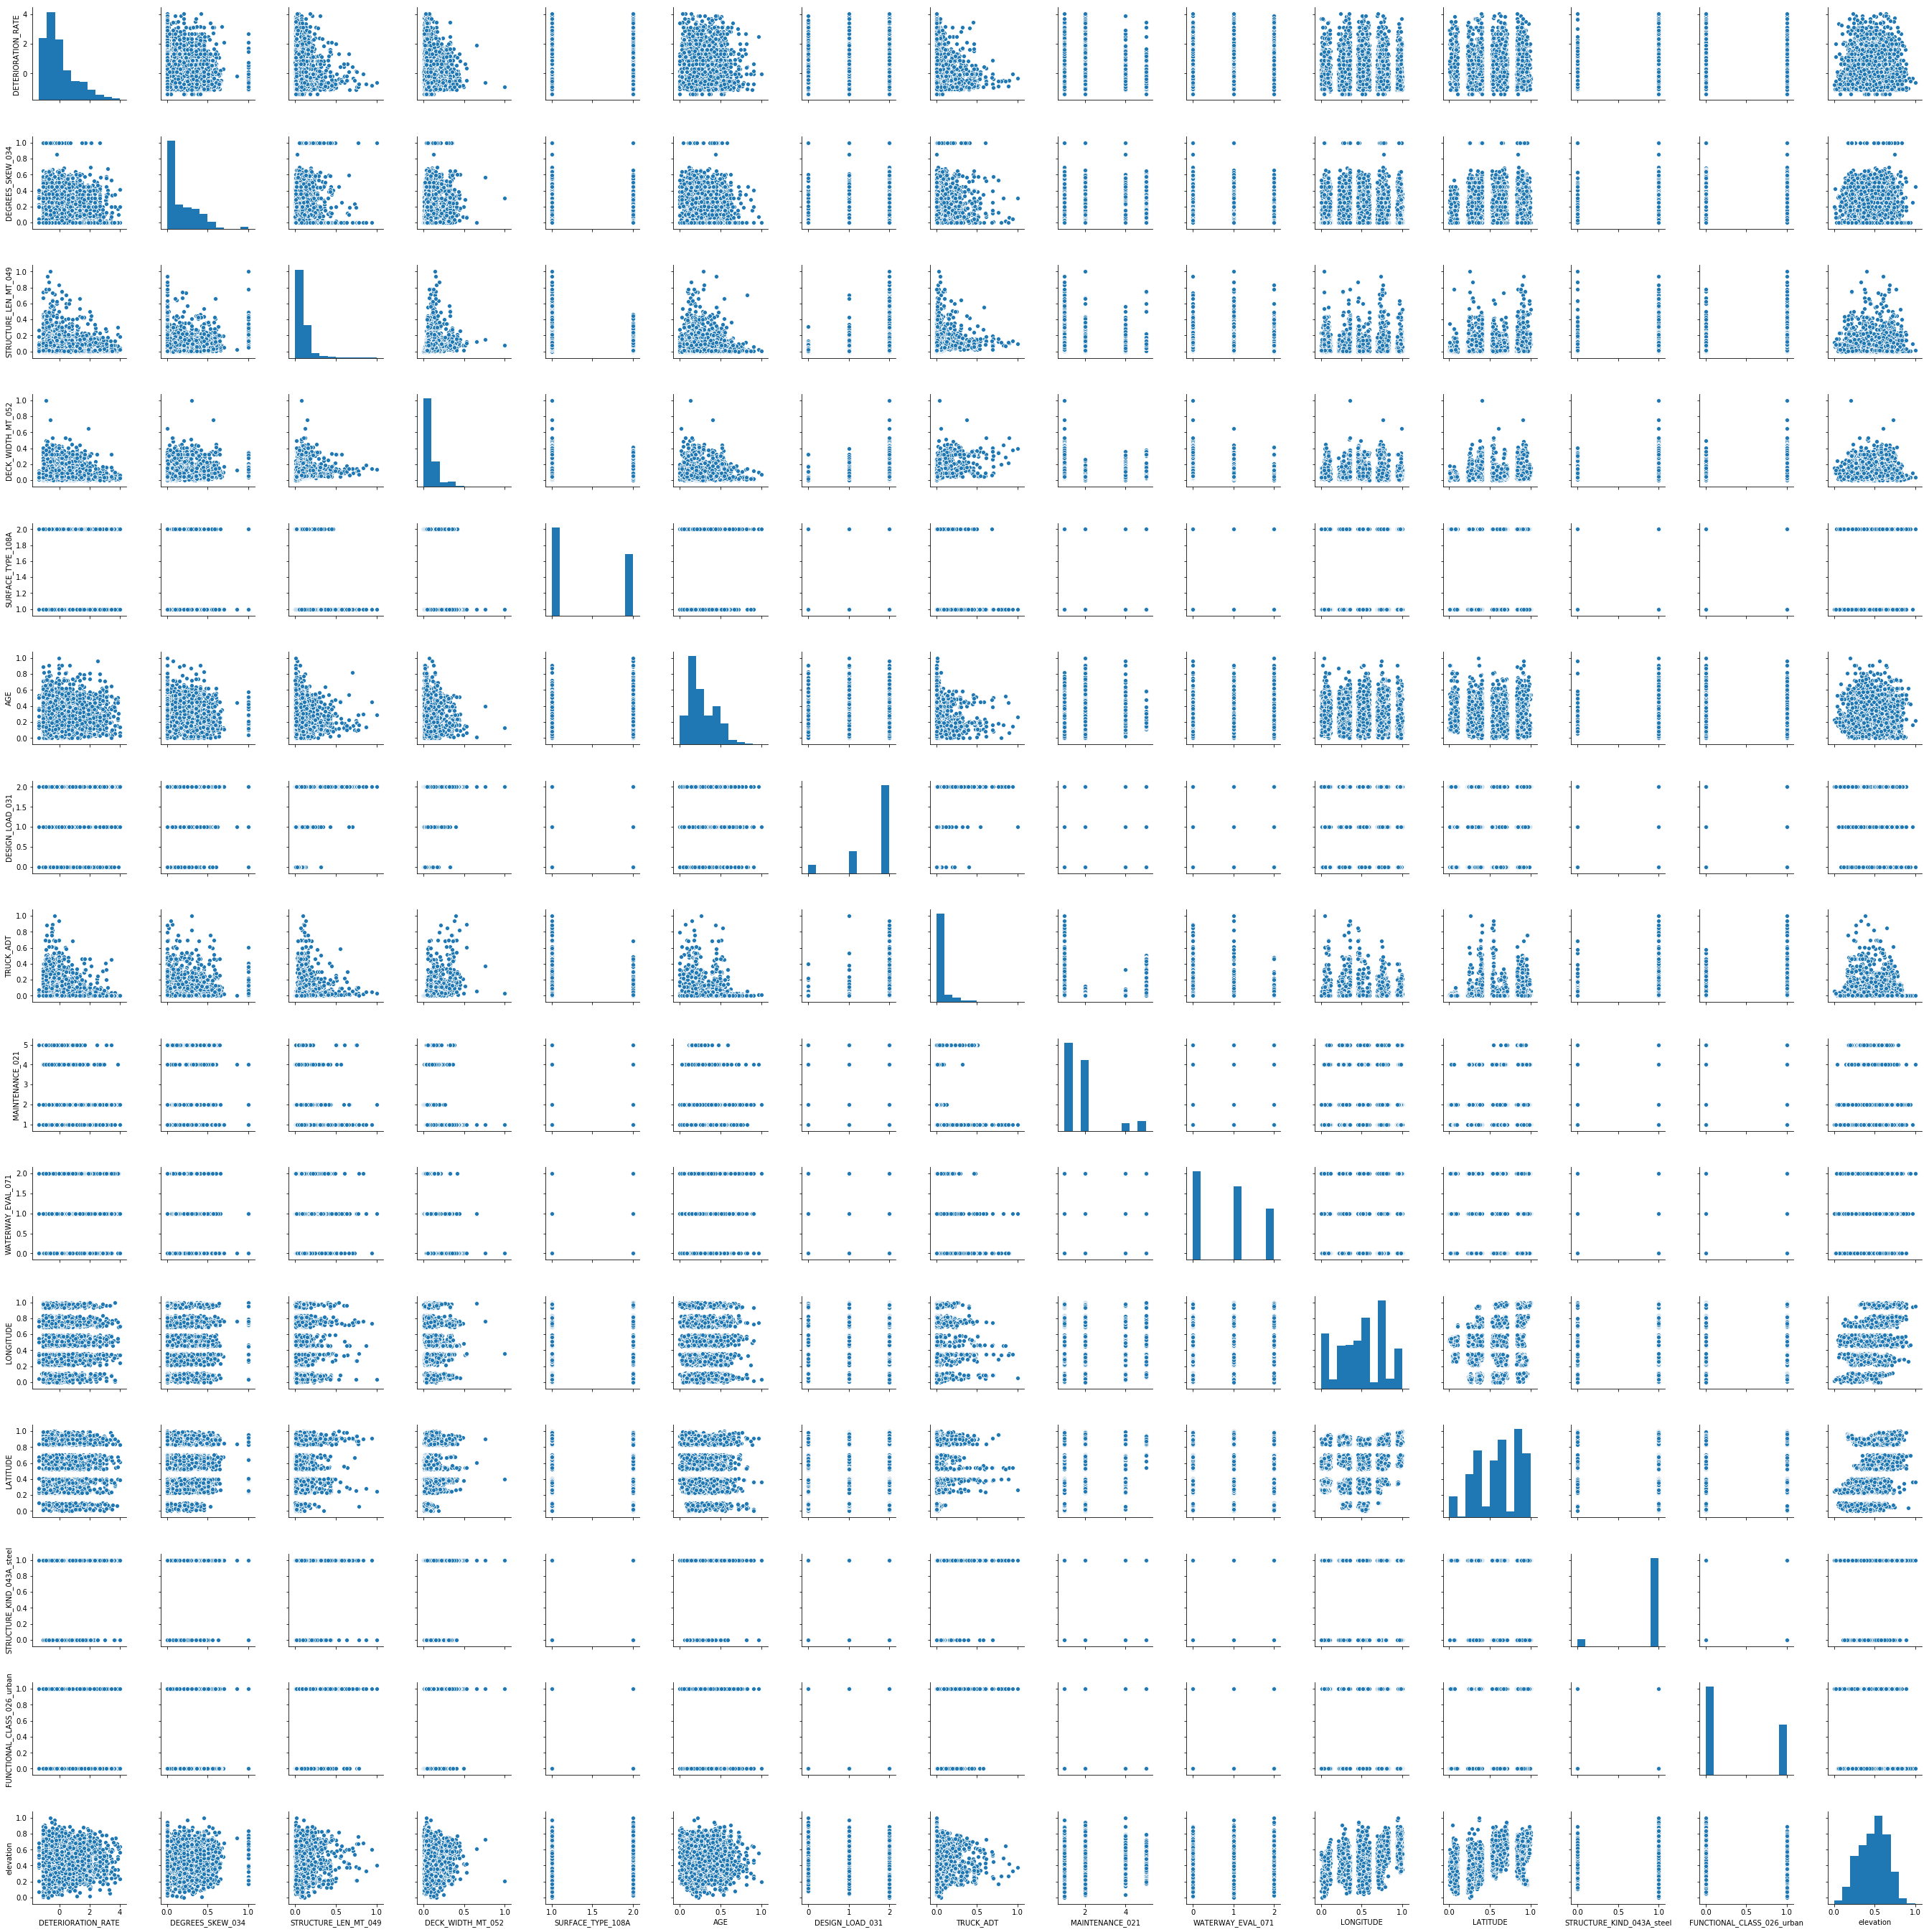

In [113]:
# Pair plot con solo OH
import seaborn as sns
sns.pairplot(df)

### Decission Tree

In [50]:
from sklearn.tree import DecisionTreeRegressor
regd_grid = GridSearchCV(DecisionTreeRegressor(),
                        param_grid={'max_depth': np.arange(2,8),
                                   'min_samples_leaf':[10,30,50,100]},
                         cv = 5,
                         scoring = 'neg_mean_absolute_error')

In [51]:
regd_grid.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]), 'min_samples_leaf': [10, 30, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [53]:
np.sqrt(-regd_grid.best_score_)

0.2539073817099383

In [60]:
regd_final = regd_grid.best_estimator_

In [61]:
r2_score(y_test,regd_final.predict(X_test))

0.13850076830032687

### Gradient Boosting

In [121]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GridSearchCV(GradientBoostingRegressor(n_estimators=50),
                  param_grid={"max_depth":np.arange(2,10),
                             "learning_rate":np.arange(1,10)/10},
                  scoring="neg_mean_absolute_error",
                  cv=5)

In [122]:
reg.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]), 'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [59]:
np.sqrt(-reg.best_score_)

0.2524634217000823

In [62]:
reggb_final = reg.best_estimator_

In [63]:
r2_score(y_test,reggb_final.predict(X_test))

0.19982731136649834

### Random Forest

In [114]:
from sklearn.ensemble import RandomForestRegressor

In [115]:
rf = GridSearchCV(RandomForestRegressor(random_state=42),
                  param_grid={"max_depth":np.arange(2,10),
                             'min_samples_leaf' : (2,4),
                             'n_estimators': (50, 100, 200, 500, 1000)},
                  scoring="neg_mean_absolute_error",
                  cv=5)

rf.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]), 'min_samples_leaf': (2, 4), 'n_estimators': (50, 100, 200, 500, 1000)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [116]:
np.sqrt(-rf.best_score_)

0.8453438180098463

In [117]:
rf.best_params_

{'max_depth': 9, 'min_samples_leaf': 4, 'n_estimators': 1000}

In [118]:
regrf_final = rf.best_estimator_
r2_score(y_test,regrf_final.predict(X_test))

0.37440660107664536

In [119]:
regrf_final.feature_importances_

array([0.03911909, 0.13796673, 0.11475407, 0.0322139 , 0.17015043,
       0.01965095, 0.09928784, 0.01778039, 0.00964477, 0.11181422,
       0.15596824, 0.00399619, 0.00481863, 0.08283454])

In [120]:
# Feature importance
rf_feature_list = pd.DataFrame(list(zip(X.columns,regrf_final.feature_importances_)), columns = ['Feature','Importance'])
rf_feature_list.sort_values(by='Importance', ascending = False).reset_index(drop=True)

,Feature,Importance
0,AGE,0.170150
1,LATITUDE,0.155968
2,STRUCTURE_LEN_MT_049,0.137967
3,DECK_WIDTH_MT_052,0.114754
4,LONGITUDE,0.111814
5,TRUCK_ADT,0.099288
6,elevation,0.082835
7,DEGREES_SKEW_034,0.039119
8,SURFACE_TYPE_108A,0.032214
9,DESIGN_LOAD_031,0.019651


### Poisson Regression

In [113]:
import statsmodels.api as sm

In [114]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [115]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     DETERIORATION_RATE   No. Observations:                 3469
Model:                            GLM   Df Residuals:                     3451
Model Family:                 Poisson   Df Model:                           17
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1065.6
Date:                Sat, 16 Nov 2019   Deviance:                       216.74
Time:                        20:05:39   Pearson chi2:                     276.
No. Iterations:                     5   Covariance Type:             nonrobust
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
TRAFFIC_LANES_ON_028A          0.0319      0.094      0.339      0.735      -0.153       0.216
MEDI

In [116]:
poisson_predictions = poisson_training_results.get_prediction(X_test)

In [117]:
predictions_summary_frame = poisson_predictions.summary_frame()


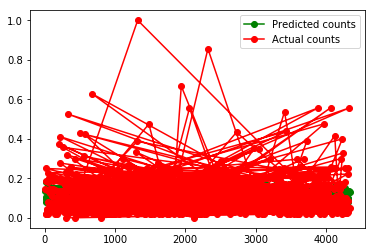

In [119]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test
fig = plt.figure()
#fig.suptitle('Predicted versus actual bicyclist counts on the Brooklyn bridge')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()